In [2]:
def get_data2():
    from sklearn.datasets import load_iris
    #获取数据
    iris = load_iris()
    x_train=pd.DataFrame(iris.data)
    features=["sepal_length","sepal_width","petal_length","petal_width"]
    x_train.columns=features
    y_train=pd.DataFrame(iris.target)
    return features, x_train, y_train


In [1]:
import pandas as pd
import xgboost as xgb
import operator
from matplotlib import pylab as plt

In [4]:
features, x_train, y_train = get_data2()


<Figure size 432x288 with 0 Axes>

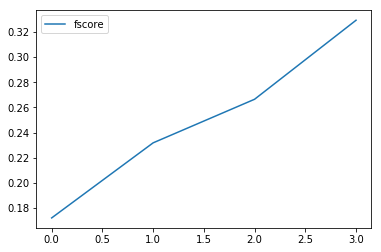

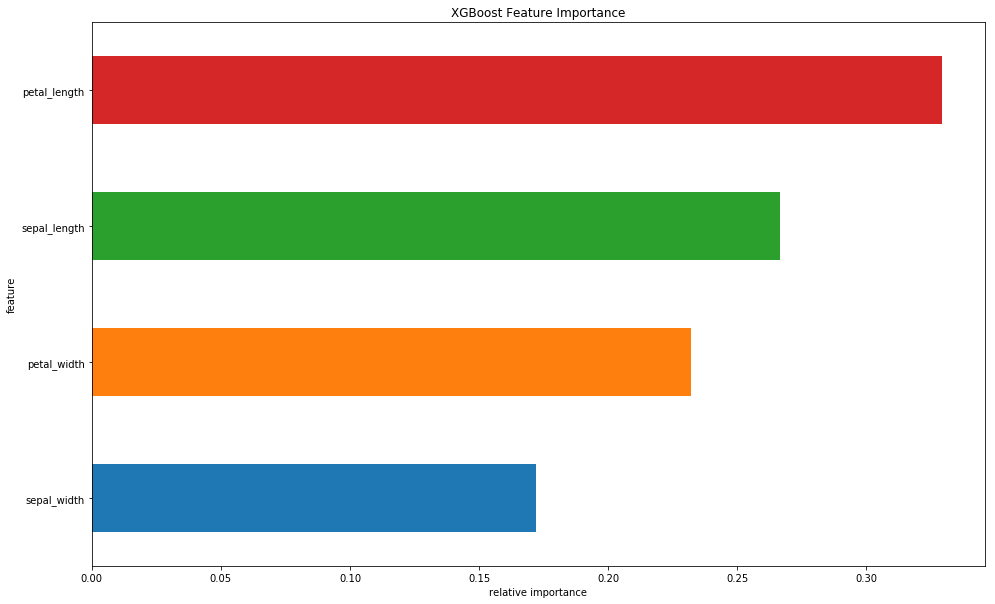

In [7]:
xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 8, "seed": 42, "silent": 1}
num_rounds = 1000

dtrain = xgb.DMatrix(x_train, label=y_train)
xgb_model = xgb.train(xgb_params, dtrain, num_rounds)

importance = xgb_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
